In [ ]:
# =============================================================================
# Celda 1: Importación de Librerías
# =============================================================================
# Importamos todas las herramientas que necesitaremos para el análisis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Configuramos el estilo y tamaño de los gráficos para una mejor visualización.
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("Librerías importadas y configuración de estilo lista.")

✅ Librerías importadas y configuración de estilo lista.


In [ ]:
# =============================================================================
# Celda 2: Conexión a la Base de Datos
# =============================================================================
# Establecemos la conexión con nuestra base de datos PostgreSQL donde reside la ABT.
# --- ¡RECUERDA REEMPLAZAR CON TUS CREDENCIALES! ---
DB_USER = 'oulad_user'
DB_PASSWORD = 'oulad_pass'
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'oulad_db'

try:
    db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
    engine = create_engine(db_url)
    print("Conexión a la base de datos PostgreSQL exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")

✅ Conexión a la base de datos PostgreSQL exitosa.


In [ ]:
# =============================================================================
# Celda 3: Carga de la Tabla Analítica Base (ABT)
# =============================================================================
# Cargamos la tabla que construimos, la cual está limpia, numérica y lista para el análisis.
query = "SELECT * FROM analytical_base_table;" # Asegúrate de que el nombre de la tabla sea el correcto

print("Cargando la ABT a un DataFrame de Pandas...")
try:
    df_abt = pd.read_sql(query, con=engine)
    print(f"¡Carga completa! Se cargaron {len(df_abt)} filas y {len(df_abt.columns)} columnas.")
except Exception as e:
    print(f"Error al ejecutar la consulta: {e}")

Cargando la ABT a un DataFrame de Pandas...
✅ ¡Carga completa! Se cargaron 32533 filas y 39 columnas.


In [4]:
# =============================================================================
# Celda 4: Inspección Básica del DataFrame
# =============================================================================
print("--- Primeras 5 filas de la ABT ---")
display(df_abt.head())

print("\n--- Información General y Tipos de Datos ---")
df_abt.info()

--- Primeras 5 filas de la ABT ---


,student_id,course_id,presentation_id,gender,region,education_level,poverty_index_band,age_band,has_disability,previous_attempts_count,...,clicks_htmlactivity,clicks_ouelluminate,clicks_dataplus,clicks_externalquiz,clicks_repeatactivity,clicks_dualpane,clicks_glossary,clicks_oucollaborate,clicks_folder,final_result
0,3733,3,1,1,8,3,10,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6516,0,3,1,6,3,9,2,0,0,...,0,0,21,0,0,0,0,0,0,2
2,8462,3,1,1,3,3,4,2,0,0,...,0,0,0,12,0,0,0,12,0,0
3,8462,3,3,1,3,3,4,2,0,1,...,0,0,0,0,0,0,0,1,0,0
4,11391,0,1,1,0,3,10,2,0,0,...,0,0,0,0,0,0,0,0,0,2



--- Información General y Tipos de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32533 entries, 0 to 32532
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   32533 non-null  int64  
 1   course_id                    32533 non-null  int64  
 2   presentation_id              32533 non-null  int64  
 3   gender                       32533 non-null  int64  
 4   region                       32533 non-null  int64  
 5   education_level              32533 non-null  int64  
 6   poverty_index_band           32533 non-null  int64  
 7   age_band                     32533 non-null  int64  
 8   has_disability               32533 non-null  int64  
 9   previous_attempts_count      32533 non-null  int64  
 10  studied_credits_total        32533 non-null  int64  
 11  registration_day             32533 non-null  int64  
 12  unregistration_day          

In [5]:
# =============================================================================
# Celda 5: Estadísticas Descriptivas
# =============================================================================
# Este es el resumen estadístico más importante. Nos da una idea de la escala,
# tendencia central y dispersión de cada variable numérica.
print("--- Estadísticas Descriptivas de las Variables Numéricas ---")
display(df_abt.describe().T)



--- Estadísticas Descriptivas de las Variables Numéricas ---


,count,mean,std,min,25%,50%,75%,max
student_id,32533.0,706173.620355,548384.633167,3733.0,508517.0,590241.000000,644384.000000,2.698591e+06
course_id,32533.0,3.109427,1.745314,0.0,1.0,3.000000,5.000000,6.000000e+00
presentation_id,32533.0,1.786955,1.070696,0.0,1.0,2.000000,3.000000,3.000000e+00
gender,32533.0,0.548305,0.497669,0.0,0.0,1.000000,1.000000,1.000000e+00
region,32533.0,5.880952,3.688854,0.0,3.0,6.000000,9.000000,1.200000e+01
education_level,32533.0,1.739465,0.749558,0.0,1.0,2.000000,2.000000,4.000000e+00
poverty_index_band,32533.0,5.034150,2.925029,0.0,3.0,5.000000,8.000000,1.000000e+01
age_band,32533.0,0.302585,0.473292,0.0,0.0,0.000000,1.000000,2.000000e+00
has_disability,32533.0,0.097163,0.296184,0.0,0.0,0.000000,0.000000,1.000000e+00
previous_attempts_count,32533.0,0.163004,0.479334,0.0,0.0,0.000000,0.000000,6.000000e+00


/var/folders/z3/6nq3cdqn3ql3385gtkps0r_40000gn/T/ipykernel_23238/3552552481.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='final_result', data=df_abt, palette='viridis')


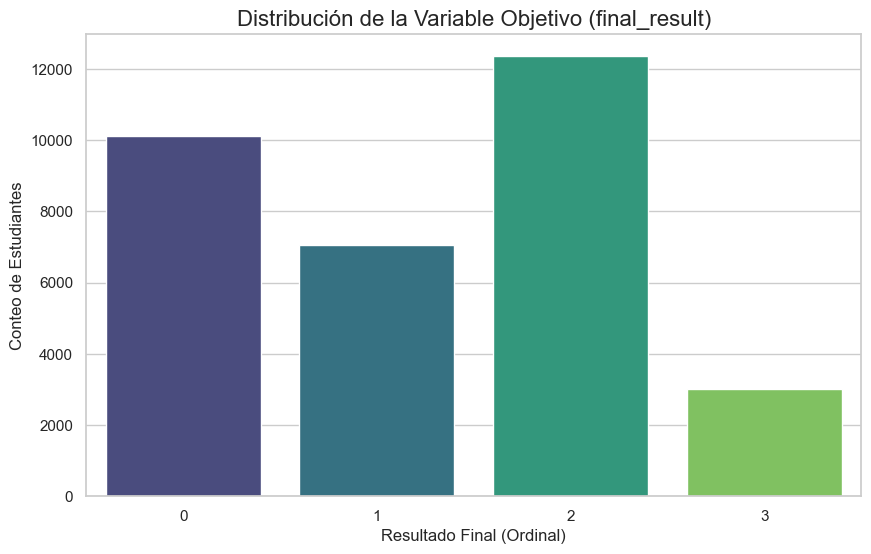

Conteo de cada categoría en 'final_result':
final_result
2    12358
0    10108
1     7044
3     3023
Name: count, dtype: int64


In [6]:
# =============================================================================
# Celda 6: Distribución de la Variable Objetivo (final_result)
# =============================================================================
# Es crucial saber si nuestras clases están balanceadas.
# final_result_ordinal: 0=Fail, 1=Pass, 2=Distinction, 3=Withdrawn (ejemplo)

plt.figure(figsize=(10, 6))
sns.countplot(x='final_result', data=df_abt, palette='viridis')
plt.title('Distribución de la Variable Objetivo (final_result)', fontsize=16)
plt.xlabel('Resultado Final (Ordinal)', fontsize=12)
plt.ylabel('Conteo de Estudiantes', fontsize=12)
plt.show()

print("Conteo de cada categoría en 'final_result':")
print(df_abt['final_result'].value_counts())

/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


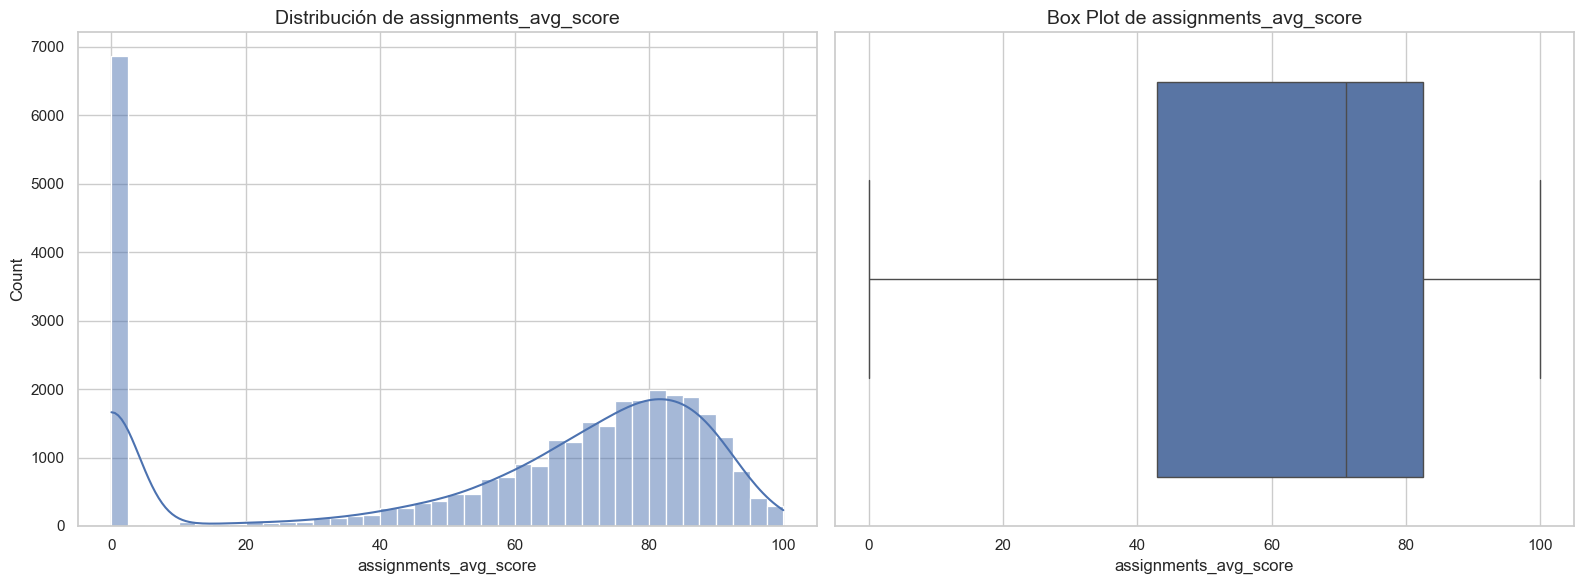

/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


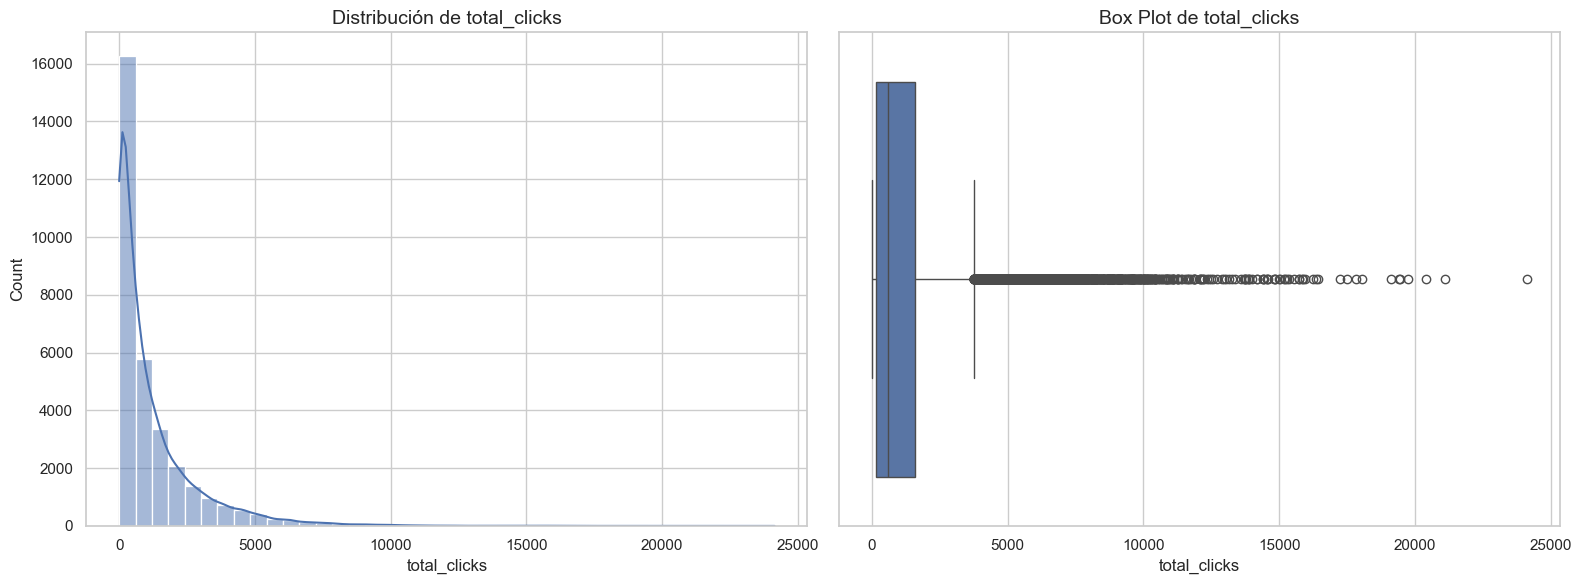

/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


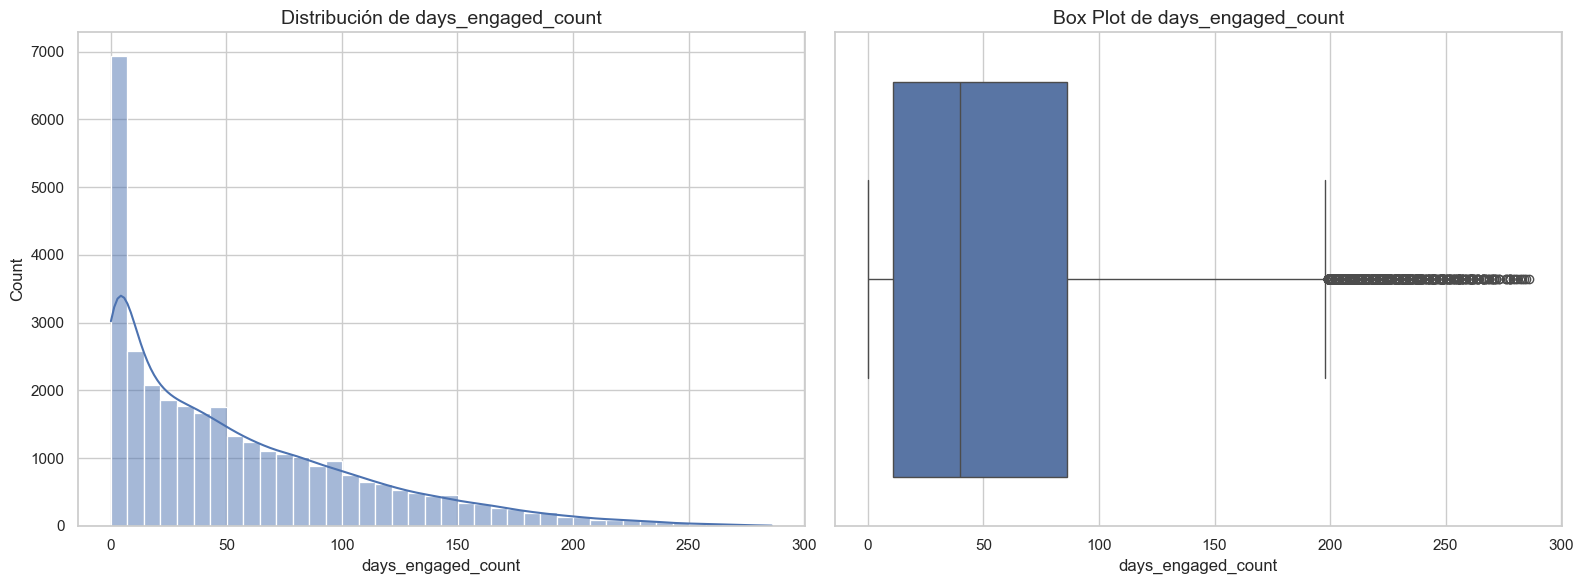

/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/opt/miniconda3/envs/oulad/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


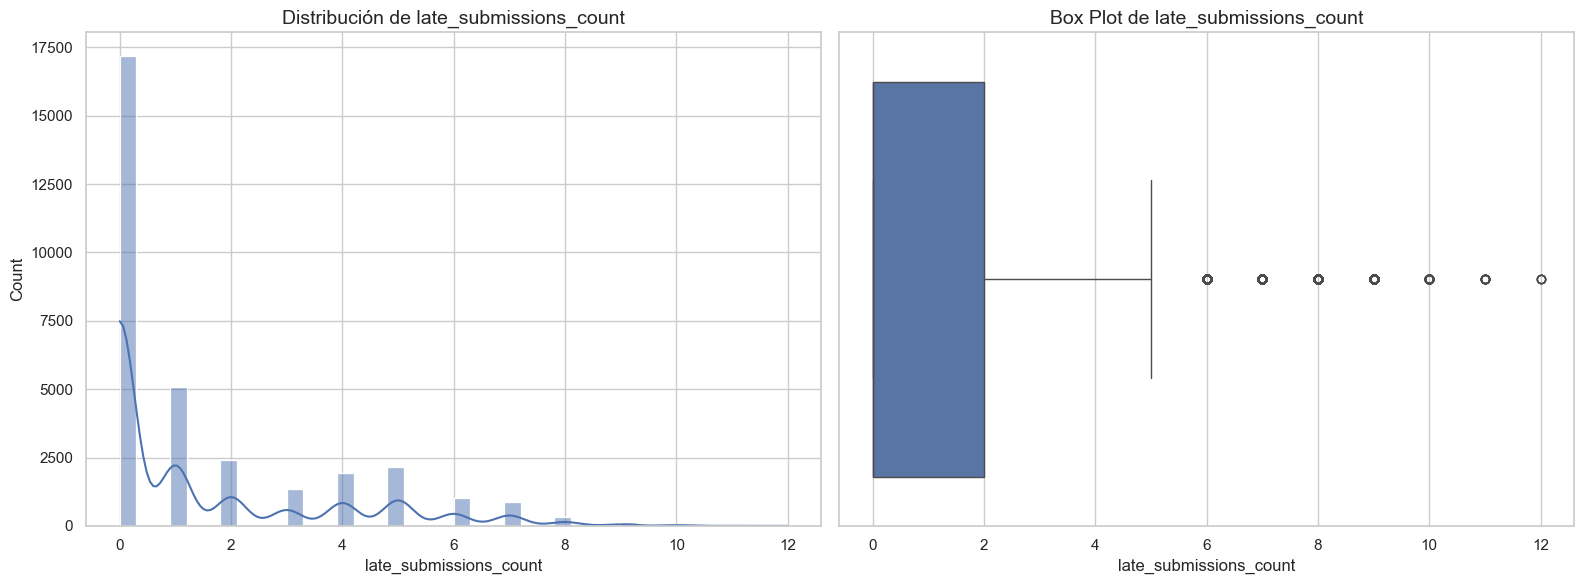

In [7]:
# =============================================================================
# Celda 7: Distribución de Características Numéricas Clave
# =============================================================================
# Analizamos la distribución de las variables más importantes para detectar sesgos o outliers.

features_to_plot = ['assignments_avg_score', 'total_clicks', 'days_engaged_count', 'late_submissions_count']

for feature in features_to_plot:
    plt.figure(figsize=(16, 6))
    
    # Histograma para ver la forma
    plt.subplot(1, 2, 1)
    sns.histplot(df_abt[feature], kde=True, bins=40)
    plt.title(f'Distribución de {feature}', fontsize=14)
    
    # Box Plot para ver outliers y cuartiles
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_abt[feature])
    plt.title(f'Box Plot de {feature}', fontsize=14)
    
    plt.tight_layout()
    plt.show()

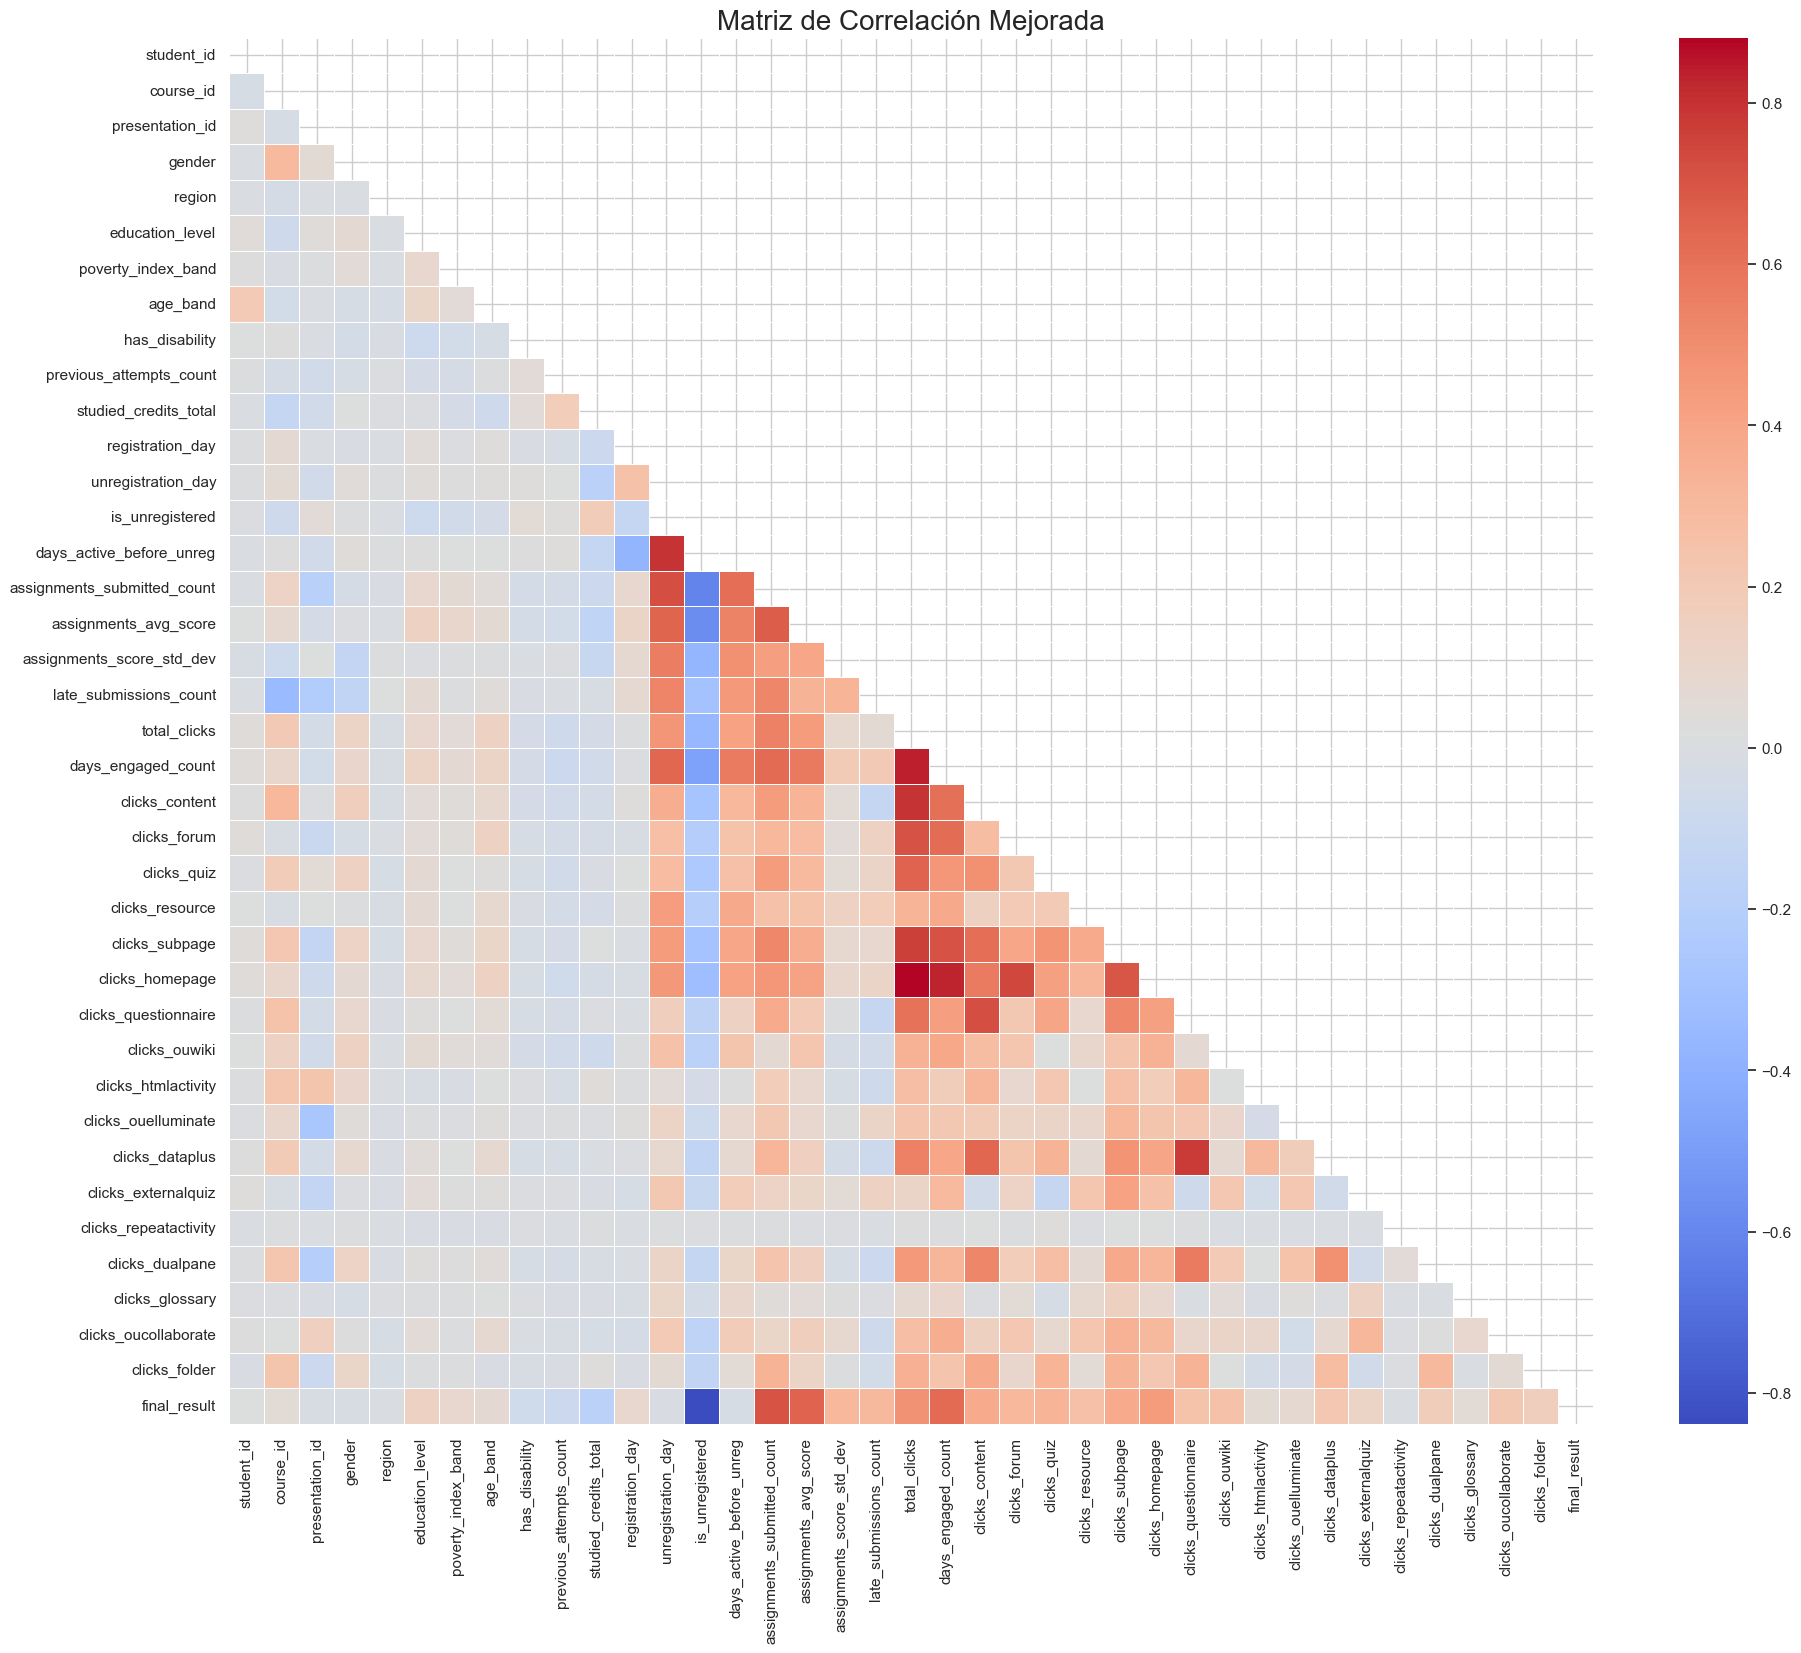

In [13]:
# =============================================================================
# Celda 8: Matriz de Correlación
# =============================================================================
# Vemos la relación lineal entre todas las variables numéricas.
# Es la mejor herramienta para tener una visión panorámica.

import numpy as np # Necesitarás numpy

# 1. Calcular la matriz de correlación (sin cambios)
correlation_matrix = df_abt.corr()

# 2. Crear una máscara para el triángulo superior
# np.triu genera una matriz de booleanos con True en el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 3. Configurar el tamaño de la figura (¡más grande!)
plt.figure(figsize=(22, 18)) # Ajusta estos números según tu pantalla

# 4. Generar el heatmap con la máscara aplicada
sns.heatmap(
    correlation_matrix,
    mask=mask,               # Aplicar la máscara
    cmap='coolwarm',         # Un buen mapa de colores para correlaciones
    annot=False,             # Mantenemos False, demasiados números para mostrar
    linewidths=.5            # Añadir líneas delgadas entre celdas
)

plt.title('Matriz de Correlación Mejorada', fontsize=20)
plt.show()

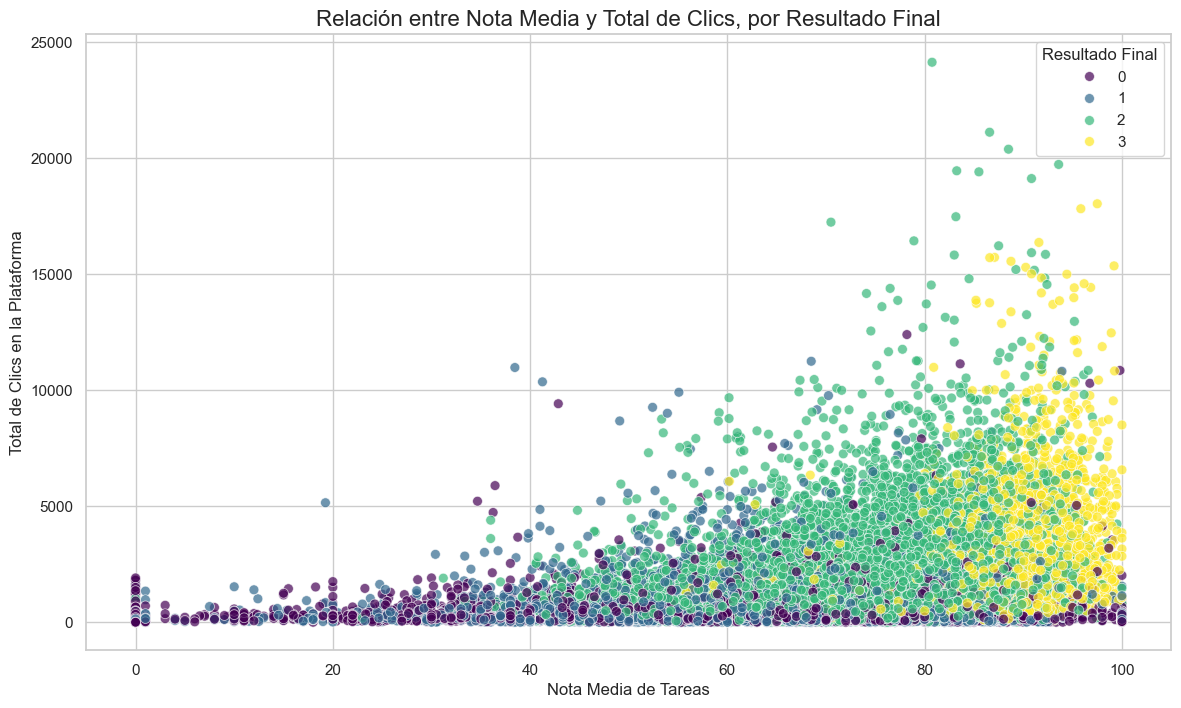

In [9]:
# =============================================================================
# Celda 9: Scatter Plot de Características Relevantes
# =============================================================================
# Visualizamos la relación entre las dos variables que parecen más prometedoras,
# coloreando por el resultado final.

sns.scatterplot(
    x='assignments_avg_score',
    y='total_clicks',
    data=df_abt,
    hue='final_result', # La dimensión clave
    palette='viridis',
    alpha=0.7,
    s=50
)
plt.title('Relación entre Nota Media y Total de Clics, por Resultado Final', fontsize=16)
plt.xlabel('Nota Media de Tareas', fontsize=12)
plt.ylabel('Total de Clics en la Plataforma', fontsize=12)
plt.legend(title='Resultado Final')
plt.show()